<a href="https://colab.research.google.com/github/5791nbm/FinCoLab/blob/main/Black_Scholes%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Black-Scholes-Merton Model

In [1]:
from scipy import stats
from numpy import log, exp, sqrt

In [41]:
def call_option_price(S, E, T, r, sigma):
    # Calc d1 and d2 parameters
    d1 = (log(S/E) + (r + sigma**2/2)*T)/(sigma*sqrt(T))
    d2 = d1 - sigma*sqrt(T)
    print("d1 and d2 parameters: %s, %s" %(d1, d2))
    # Use N(x) to calc the price of the option
    return S*stats.norm.cdf(d1) - E*exp(-r*T)*stats.norm.cdf(d2)

def put_option_price(S, E, T, r, sigma):
    # Calc d1 and d2 parameters
    d1 = (log(S/E) + (r + sigma**2/2)*T)/(sigma*sqrt(T))
    d2 = d1 - sigma*sqrt(T)
    print("d1 and d2 parameters: %s, %s" %(d1, d2))
    # Use N(x) to calc the price of the option
    return -S*stats.norm.cdf(-d1) + E*exp(-r*T)*stats.norm.cdf(-d2)

if __name__ == "__main__":
  #underlying stock price
  S0= 100
  E= 100
  T= 1
  r= 0.05
  sigma= 0.2

  print("Call option price: %s" %call_option_price(S0, E, T, r, sigma))
  print("Put option price: %s" %put_option_price(S0, E, T, r, sigma))

d1 and d2 parameters: 0.35000000000000003, 0.15000000000000002
Call option price: 10.450583572185565
d1 and d2 parameters: 0.35000000000000003, 0.15000000000000002
Put option price: 5.573526022256971


Monte-Carlo Simulations

Prediction for future stock price: $54.33


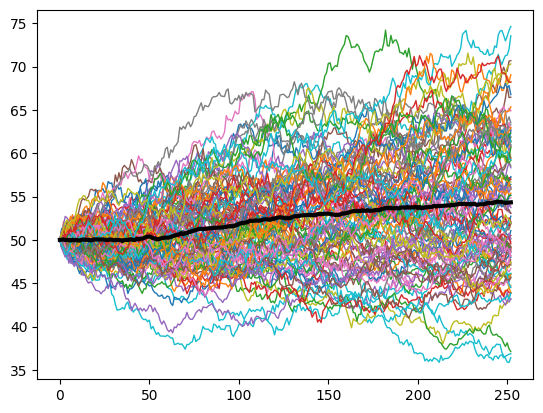

In [42]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

NUM_OF_SIMULATION = 100

def stock_monte_carlo(S0, mu, sigma, N=252):
  result = []

  for _ in range(NUM_OF_SIMULATION):
    prices = [S0]
    for _ in range(N):
      # we simulate the day to day change (t=1)
      stock_price = prices[-1] * np.exp((mu - 0.5 * sigma ** 2) + sigma * np.random.normal())
      prices.append(stock_price)
    result.append(prices)

  simulation_data = pd.DataFrame(result)
  simulation_data = simulation_data.T
  simulation_data['mean'] = simulation_data.mean(axis=1)

  #print(simulation_data)
  print('Prediction for future stock price: $%.2f' % simulation_data['mean'].iloc[-1])
  plt.plot(simulation_data, linewidth=1)
  plt.plot(simulation_data['mean'], 'black', linewidth=3)
  plt.show()

if __name__ == "__main__":
  #underlying stock price
  S0= 50
  mu= 0.0002
  sigma= 0.01

  stock_monte_carlo(S0, mu, sigma)